In [107]:
#import neccesory libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [108]:
#load dataset
df = pd.read_csv('supply_chain_data.csv')

In [109]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [110]:
df.shape

(100, 24)

In [111]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [112]:
#data description
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [113]:
#finding NAN Values
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


**Data Visualization**

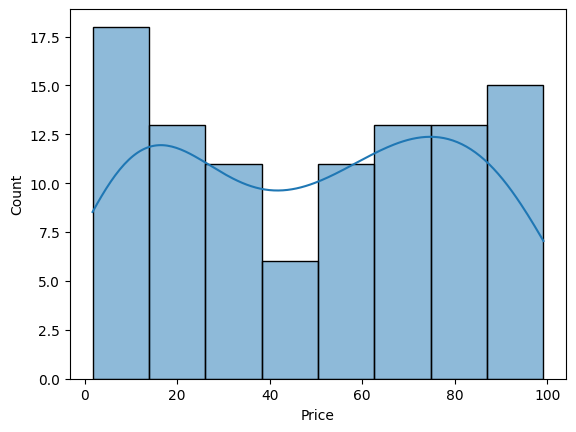

In [114]:
#product price visulization
sns.histplot(df['Price'], kde=True)
plt.show()

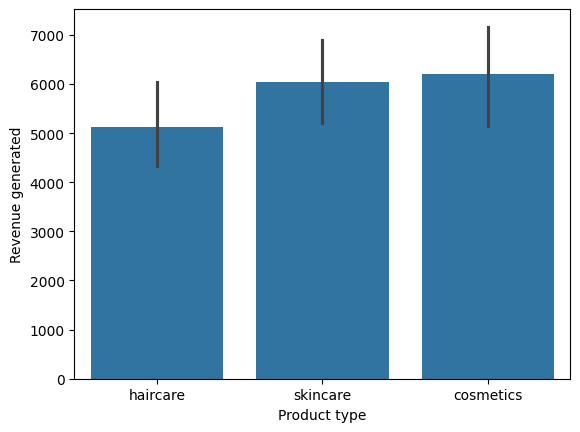

In [115]:
# Revenue Generated visulization
sns.barplot(x='Product type', y='Revenue generated', data= df)
plt.show()

Sales Performance Aanalysis

In [116]:

Top_selling_Products = df.groupby ("Product type")["Number of products sold"].sum().sort_values(ascending = False)
print(Top_selling_Products)

Product type
skincare     20731
haircare     13611
cosmetics    11757
Name: Number of products sold, dtype: int64


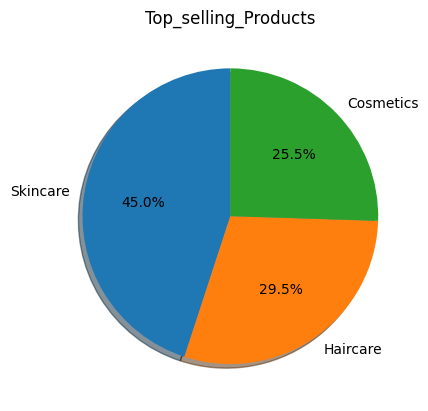

In [117]:
#selling visualization
plt.title('Top_selling_Products')
labels = ['Skincare', 'Haircare', 'Cosmetics']
plt.pie(Top_selling_Products, labels = labels, autopct = '%1.1f%%',shadow= True, startangle = 90)
plt.show()

<Axes: >

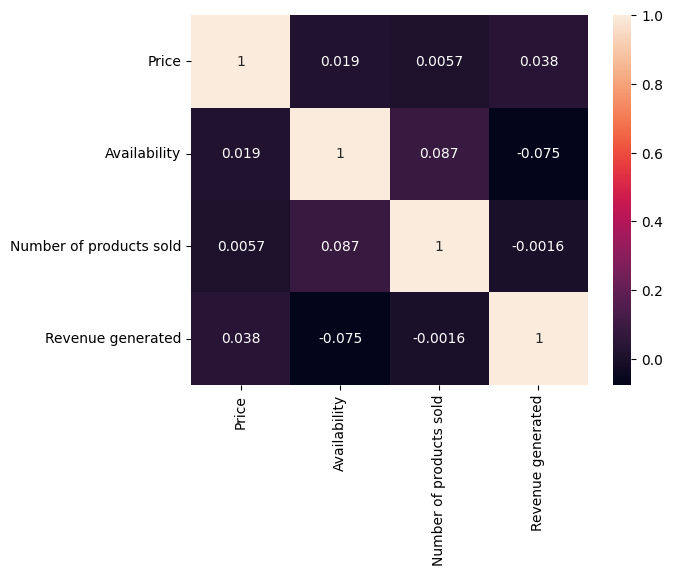

In [118]:
#corelation visulization
corr_matrix = df[['Price', 'Availability', 'Number of products sold', 'Revenue generated']].corr()
sns.heatmap(corr_matrix, annot= True)

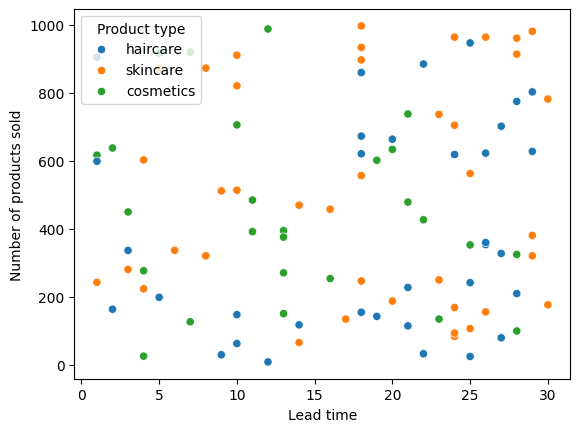

In [119]:
# product selling time
sns.scatterplot(x = 'Lead time', y = 'Number of products sold',hue = 'Product type',data = df)
plt.show()

# product shpping Analysis

In [120]:
shipping_performance = df.groupby('Shipping carriers')[['Shipping times', 'Shipping costs']].mean()
print(shipping_performance)

                   Shipping times  Shipping costs
Shipping carriers                                
Carrier A                6.142857        5.554923
Carrier B                5.302326        5.509247
Carrier C                6.034483        5.599292


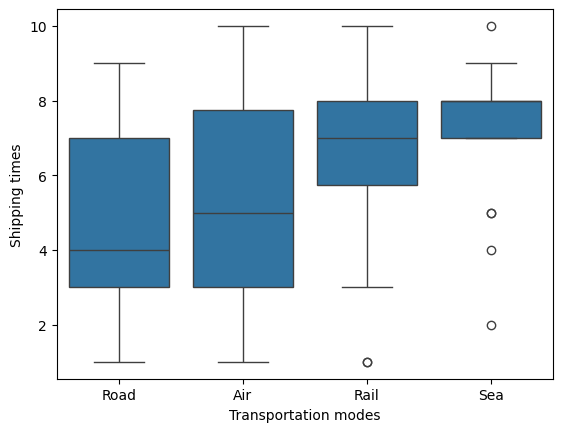

In [121]:
#Transport product vizulization
sns.boxplot(x='Transportation modes', y='Shipping times', data= df)
plt.show()

**Manufactring Analysis**

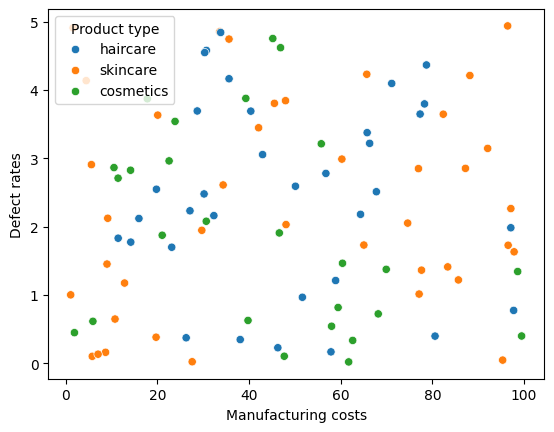

In [122]:
#product manufactuing Visulization
sns.scatterplot(x='Manufacturing costs', y='Defect rates', hue='Product type', data=df)
plt.show()

**product Inspection**

Inspection results
Fail       2.569302
Pass       2.039043
Pending    2.154218
Name: Defect rates, dtype: float64


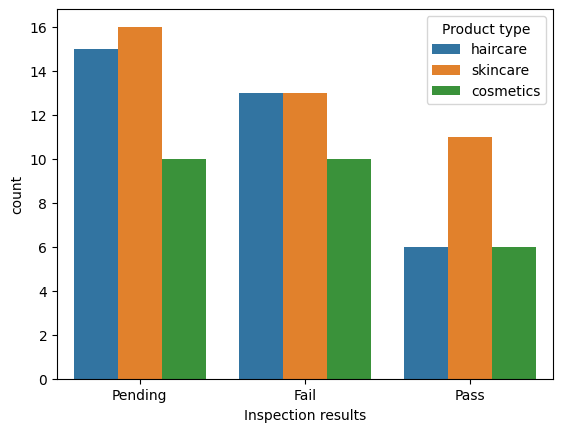

In [123]:
#product Inspection result Visualization
inspection_summary = df.groupby('Inspection results')['Defect rates'].mean()
print(inspection_summary)

sns.countplot(x='Inspection results', hue='Product type', data=df)
plt.show()


**Manufacturing cost Analysis**

Manufacturing costs     47.266693
Shipping costs           5.548149
Costs                  529.245782
dtype: float64


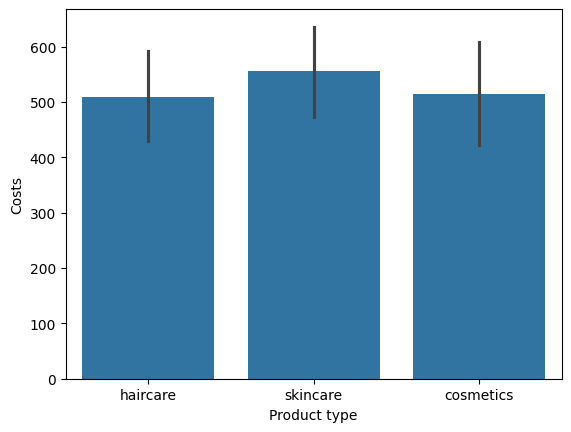

In [124]:
#cost Analysis
cost_summary = df[['Manufacturing costs', 'Shipping costs', 'Costs']].mean()
print(cost_summary)

sns.barplot(x='Product type', y='Costs', data=df)
plt.show()


**Insights:**

Cost Breakdown:
The average manufacturing cost is approximately 47.27.

The average shipping cost is around 5.55.

The overall average cost across all products is 529.25.

**Product Type Cost Distribution:**

There is a significant variation in costs across different product types.

Some product types may have disproportionately high costs,
indicating potential inefficiencies or the need for cost control in \certain areas.